In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [14]:
sal_h=pd.read_csv("Salary_Data.csv")

In [15]:
sal_h.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
sal_h.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


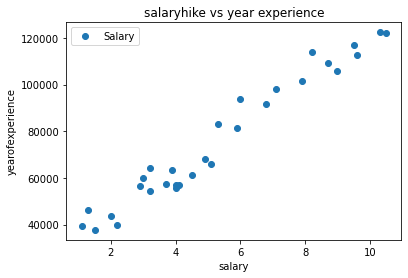

In [17]:
sal_h.plot(x='YearsExperience' , y='Salary', style='o')
plt.title("salaryhike vs year experience")
plt.xlabel('salary')
plt.ylabel('yearofexperience')
plt.show()

In [18]:
from scipy.stats import pearsonr
corr, _ = pearsonr(sal_h['Salary'], sal_h['YearsExperience'])
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.978


In [19]:
from scipy.stats import spearmanr
# calculate spearman's correlation
corr, _ = spearmanr(sal_h['Salary'], sal_h['YearsExperience'])
print('Spearmans correlation: %.3f' % corr)


Spearmans correlation: 0.957


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


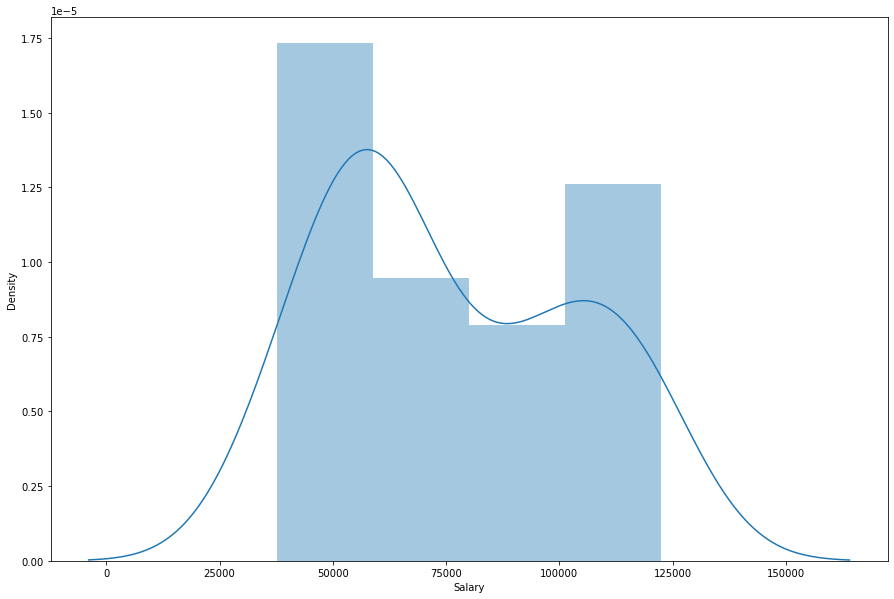

In [20]:

import seaborn as sns
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(sal_h['Salary'])
plt.show()

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


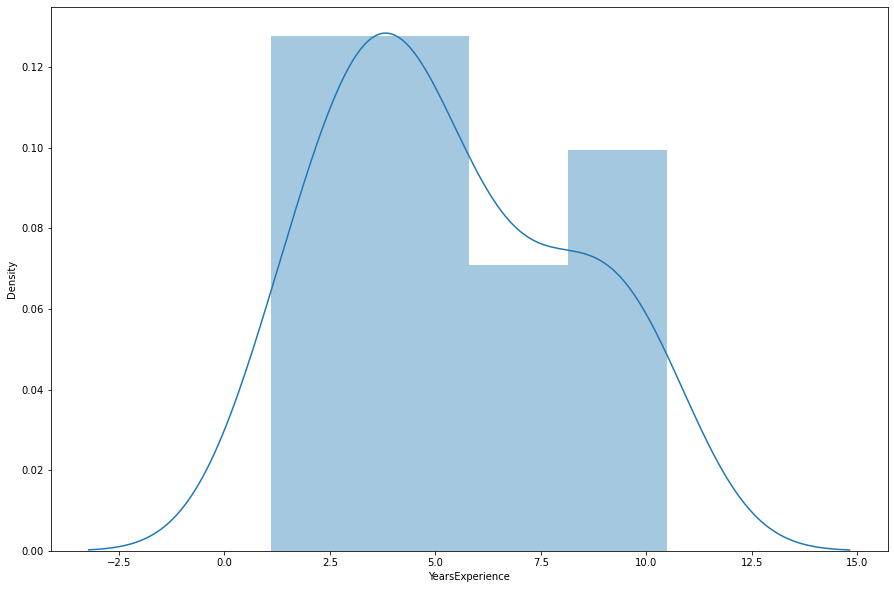

In [22]:

plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(sal_h['YearsExperience'])
plt.show()

In [23]:
# Input dataset
X = sal_h['Salary'].values.reshape(-1,1)
print(X)
# Output or Predicted Value of data
y = sal_h['YearsExperience'].values.reshape(-1,1)
#print(log(y))


[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

In [26]:
predict_reg = LinearRegression()

In [27]:
predict_reg.fit(X_train, y_train)

LinearRegression()

In [28]:
print(" Intercept value of Model is " ,predict_reg.intercept_)
print("Coefficient value of Model is ", predict_reg.coef_)

 Intercept value of Model is  [-2.4077501]
Coefficient value of Model is  [[0.00010235]]


In [29]:
y_pred = predict_reg.predict(X_test)

In [30]:
pmsh_pf = pd.DataFrame({'Actual':y_test.flatten(), 'Predict': y_pred.flatten()})
pmsh_pf

,Actual,Predict
0,9.6,9.120593
1,4.9,4.545795
2,8.2,9.241061
3,5.3,6.096418
4,3.2,4.188282
5,3.7,3.445621


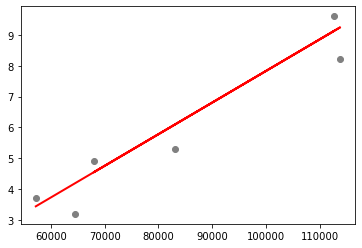

In [31]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()


In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score :          ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.6522919548483546
Mean Squared Error: 0.5191320118982418
Root Mean Squared Error: 0.7205081622703811
R^2 Score :           0.9039484379486216
